In [1]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import numpy as np
import matplotlib.pyplot as plt
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 16.0.2+7-67, mixed mode, sharing)
  Starting server from C:\Users\Hariprasath\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HARIPR~1\AppData\Local\Temp\tmp7po9xzwf
  JVM stdout: C:\Users\HARIPR~1\AppData\Local\Temp\tmp7po9xzwf\h2o_Hariprasath_started_from_python.out
  JVM stderr: C:\Users\HARIPR~1\AppData\Local\Temp\tmp7po9xzwf\h2o_Hariprasath_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_Hariprasath_k43cw5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.838 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [4]:
data=h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/gbm_test/BostonHousing.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
train, valid = data.split_frame(ratios=[0.7], seed=1234)

In [6]:
predictors = data.columns[:-1]
response = data.columns[-1]


In [8]:
model = H2OGeneralizedLinearEstimator(family="gaussian", link="identity")
model.train(x=predictors, y=response, training_frame=train)
predictions = model.predict(valid)
pred_vals = predictions.as_data_frame().values.flatten()
act_vals = valid[response].as_data_frame().values.flatten()

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Mean Squared Error: 32.78175296277362


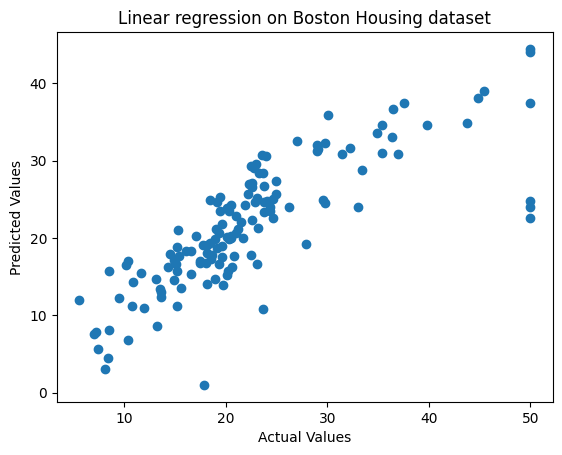

In [9]:
mse = np.mean((act_vals - pred_vals) ** 2)
print("Mean Squared Error:", mse)
plt.scatter(act_vals, pred_vals)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear regression on Boston Housing dataset")
plt.show()

In [10]:
h2o.shutdown()


H2O session _sid_9abc closed.


C:\Users\Hariprasath\AppData\Local\Temp\ipykernel_7184\2157244593.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
